# Lab 4

Ali Tejani, amt3639

Caroline Yao, chy253

## Problem 1: PCA

### 1. Plot two 3D multivariate distributions

In [355]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [356]:
# randomly sample distributions 20 times each
cov1 = [[.5,0,0],[0,.5,0],[0,0,0.7]]
cov2 = [[.5,0,0],[0,.5,0],[0,0,0.01]]
p1 = np.random.multivariate_normal([0,0,0],cov1,20)
p2 = np.random.multivariate_normal([1,1,1],cov2,20)

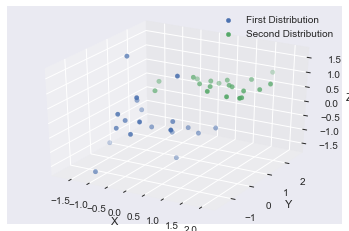

In [357]:
# plot on 3d graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p1[:,0],p1[:,1],p1[:,2],label='First Distribution')
ax.scatter(p2[:,0],p2[:,1],p2[:,2],label='Second Distribution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

### 2. What do the points look like?

The distributions are centered around two different points: (0,0,0) and (1,1,1). The first distribution has a greater range of Z values than the second, which seems almost flat. Other than this, the distributions look vaguely similar in the X and Y directions. The first distribution looks like a ball in space and the second looks like a disk

### 3. Covariance of the new set

In [358]:
# concatenate samples and compute covariance  
samples = np.concatenate((p1,p2)) # 40x3 matrix
# print ('Samples Matrix')
# print (samples)
print ("Actual Covariance Matrix")
print (np.cov(samples.T))
mean = np.mean(samples, axis=0)
norm = samples - mean
print ("Calculated Covariance Matrix")
covXY = np.dot(norm.T,norm)/(40-1)
print (covXY)

Actual Covariance Matrix
[[ 0.95929459  0.46410913  0.42520524]
 [ 0.46410913  0.82554251  0.27002098]
 [ 0.42520524  0.27002098  0.71408984]]
Calculated Covariance Matrix
[[ 0.95929459  0.46410913  0.42520524]
 [ 0.46410913  0.82554251  0.27002098]
 [ 0.42520524  0.27002098  0.71408984]]


The formula for calculating covariance is:
$$\sum_{}^\wedge = \frac{1}{n}\times\sum_{i\in S}^nX^i\cdot \left(X^i\right)^T$$
where x is the point vector. 

This is equivalent to 
$$\sum_{}^\wedge{_{ab}} = \frac{1}{n} \sum_{i=1}^nX_a^i\cdot X^i_b = \frac{1}{n} \left(X_a^T\cdot X_b\right)$$
where 
$$ X_a = \begin{bmatrix}X_a^1 \\ X_a^2 \\ ... \\ X_a^n \end{bmatrix}$$

Therefore, given 
$$ X = \begin{bmatrix}X_1^1 & X_2^1 & ... & X_m^1 \\ X_1^2  & X_2^2 & ... & X_m^2\\ ... \\ X_1^n  & X_2^n & ... & X_m^n\end{bmatrix}$$
with *n* being the number of samples and *m* being the dimension of the distribution,
$$\sum_{}^\wedge = \frac{1}{n}\left( X^T\cdot X\right)$$ 

### 4. PCA with rank 2

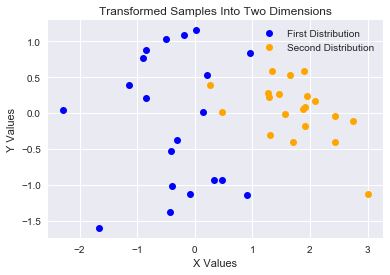

Yes, PCA made it easier to distinguish the two distributions in two dimensions and see their differences.


In [359]:
values,vectors = np.linalg.eig(covXY)
indices = np.argsort(values)[-2:]
vector1 = vectors[:,indices[1]] #eigenvector with the largest eigenvalue
vector2 = vectors[:,indices[0]] #eigenvector with the second largest eigenvalue'

newVectors = np.column_stack((vector1,vector2)) # 3x2 eigenvector matrix
transformed = np.dot(newVectors.T,samples.T) # 2x3 * 3x40 = 2x40 matrix

plt.plot(transformed[0,0:20],transformed[1,0:20],'o',color='blue',label='First Distribution');
plt.plot(transformed[0,20:],transformed[1,20:],'o',color='orange',label='Second Distribution');
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Transformed Samples Into Two Dimensions')
plt.legend()
plt.show()

print ('Yes, PCA made it easier to distinguish the two distributions in two dimensions and see their differences.')

## Problem 2: Low rank approximation of Mona Lisa

### 1. Low rank approximation

(603L, 400L)
Show rank k= 2,k= 5 and k= 10 approximation to Mona Lisa
Rank = 2


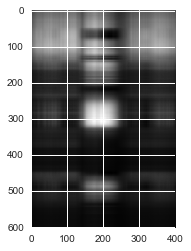

Rank = 5


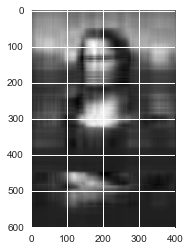

Rank = 10


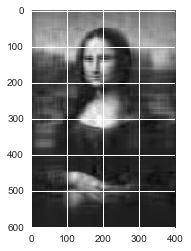

In [360]:
from PIL import Image
img = np.array(Image.open('inputs/mona_lisa.png').convert('L'))
print (img.shape)

print ('Show rank k= 2,k= 5 and k= 10 approximation to Mona Lisa')
# svd
u, s, v = np.linalg.svd(img,full_matrices=False)
for k in [2,5,10]:
    s2 = s.copy()
    s2[k:] = 0
    print 'Rank =',k
    # reverse svd
    lowRankImg = np.dot(np.dot(u, np.diag(s2)), v)
    plt.gray()
    plt.imshow(lowRankImg)
    plt.show()

### 2. Compressed Mona Lisa bits for each rank

To store the compressed image, we will only store the singular values we are interested in and their corresponding eigenvectors. Assuming we store each number as a python float (64 bits), our low rank approximations can be stored in fewer bits that the original. We can reduce this value if we use 32 bit floats.


Rank = x has ((x)(603) + x + (x)(400))(64) bits

Rank = 2 : 128512 bits

Rank = 5 : 321280 bits

Rank = 10 : 642560 bits

Original Image : 3859200 bits

## Problem 3: Using Low Rank Structure for Corrupted Entries

We notice that the matrix is not symmetric. The one of the values where the matrix is not symmetric is always 9999. If we correct this, we see a few outlying points in the rank 2 approximation, which we project onto the best fit line of the other points.

Corrupt Matrix:


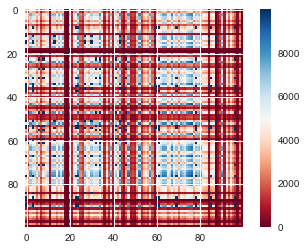

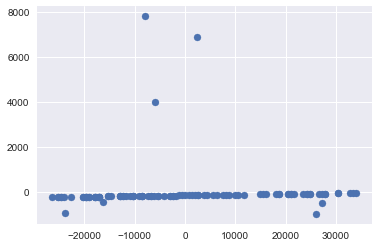

In [415]:
corrMat1 = np.genfromtxt('inputs/CorrMat1.csv', delimiter=',')
from sklearn.decomposition import PCA

print "Corrupt Matrix:"
plt.imshow(corrMat1,cmap="RdBu")
plt.colorbar()
plt.show()

# make symmetric
for i in range(corrMat1.shape[0]):
    for j in range(corrMat1.shape[1]):
        if(not np.isclose(corrMat1[i][j], corrMat1[j][i])):
            val = corrMat1[i][j] if (not np.isclose(corrMat1[i][j], 9999)) else corrMat1[j][i] 
            corrMat1[i][j] = val
            corrMat1[j][i] = val

pca = PCA(n_components=2)
# rank 2 approximation 
transformed = pca.fit_transform(corrMat1)
plt.scatter(transformed[:,0],transformed[:,1])

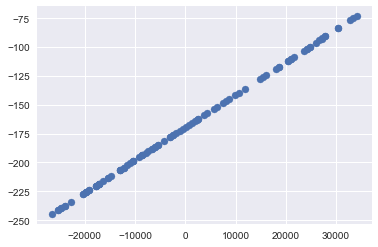

In [416]:
uncorrPoints = transformed[np.logical_and(transformed[:,1]>-400,transformed[:,1]<2000)]
corrPoints = np.array([i for i in transformed if not i in uncorrPoints])
# project points onto best fit line of uncorrupted data
corrPoints[:,1] = np.poly1d(np.polyfit(uncorrPoints[:,0], uncorrPoints[:,1], 1))(corrPoints[:,0])
newPoints = np.append(uncorrPoints,corrPoints, axis=0)
plt.scatter(newPoints[:,0],newPoints[:,1])

Fixed Matrix:


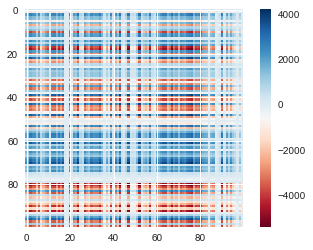

In [417]:
uncorrMat1 = np.dot(newPoints,pca.components_)
print "Fixed Matrix:"
plt.imshow(uncorrMat1,cmap="RdBu")
plt.colorbar()
plt.show()

We perform the same transformation on corrMat3

In [368]:
corrMat3 = np.genfromtxt('inputs/CorrMat3.csv', delimiter=',')

Corrupt Matrix:


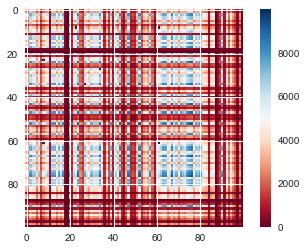

In [409]:
print "Corrupt Matrix:"
plt.imshow(corrMat1,cmap="RdBu")
plt.colorbar()
plt.show()
for i in range(corrMat3.shape[0]):
    for j in range(corrMat3.shape[1]):
        if(not np.isclose(corrMat3[i][j], corrMat3[j][i])):
            val = corrMat3[i][j] if (not np.isclose(corrMat3[i][j], 9999)) else corrMat3[j][i] 
            corrMat3[i][j] = val
            corrMat3[j][i] = val

Fixed Matrix:


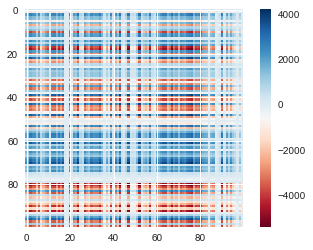

In [410]:
print "Fixed Matrix:"
plt.imshow(uncorrMat1,cmap="RdBu")
plt.colorbar()
plt.show()

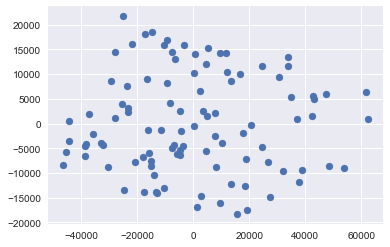

In [370]:
pca = PCA(n_components=2)
# rank 2 approximation 
transformed3 = pca.fit_transform(corrMat3)
plt.scatter(transformed3[:,0],transformed3[:,1])

## Problem 4: Getting more into Kaggle

Based on https://www.kaggle.com/apapiu/regularized-linear-models

In [371]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%matplotlib inline

### 2. Trying simple ridge and lasso regressions

In [372]:
# load data
train = pd.read_csv("inputs/train.csv")
test = pd.read_csv("inputs/test.csv")

In [373]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [374]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [375]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [376]:
#split rows that arent comparable
all_data = pd.get_dummies(all_data)
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [377]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [378]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [379]:
model_ridge = RidgeCV().fit(X_train, y)
rmse_cv(model_ridge).mean()

0.12733734664589785

In [380]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
print rmse_cv(model_lasso).mean()
print model_lasso.alpha_

0.12314421091
0.0005


In [381]:
lasso_preds = np.expm1(model_lasso.predict(X_test))
ridge_preds = np.expm1(model_ridge.predict(X_test))
solutionLasso = pd.DataFrame({"id":test.Id, "SalePrice":lasso_preds},columns = ("id","SalePrice"))
solutionLasso.to_csv("outputs/lasso_sol.csv", index = False)
solutionRidge = pd.DataFrame({"id":test.Id, "SalePrice":ridge_preds},columns = ("id","SalePrice"))
solutionRidge.to_csv("outputs/ridge_sol.csv", index = False)

Our best score for simple Lasso Regression was 0.12096
Our best score for simple Ridge Regression was 0.12224
We can do better!

### 3. l0 norm vs alpha

0.12256735885048134

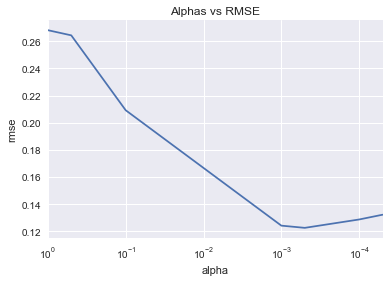

In [382]:
alphas = [1, 0.5, 0.1, 0.001, 0.0005, 0.0001, 0.00005]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Alphas vs RMSE",logx=True)
plt.xlabel("alpha")
plt.ylabel("rmse")
cv_lasso.min()

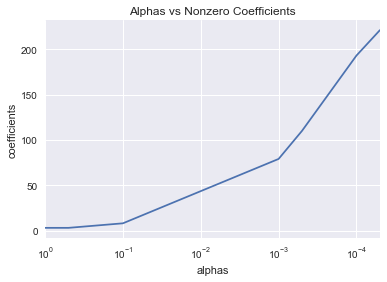

In [383]:
alphas = [1, 0.5, 0.1, 0.001, 0.0005, 0.0001, 0.00005]
nonzero_coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha).fit(X_train, y)
    coef = pd.Series(lasso.coef_, index = X_train.columns)
    nonzero_coefs.append(sum(coef != 0))
coef_lasso = pd.Series(nonzero_coefs, index = alphas)
coef_lasso.plot(title = "Alphas vs Nonzero Coefficients",logx=True)
plt.xlabel("alphas")
plt.ylabel("coefficients")

### 4. Stacking results

In [384]:
lasso_results = model_lasso.predict(all_data)
ridge_results = model_ridge.predict(all_data)
all_data['Lasso'] = lasso_results
all_data['Ridge'] = ridge_results

In [385]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]

In [386]:
model_stacked_ridge = RidgeCV().fit(X_train, y)
rmse_cv(model_stacked_ridge).mean()

0.12358678320395178

In [387]:
ridge_preds_stacked = np.expm1(model_stacked_ridge.predict(X_test))
solutionRidge2 = pd.DataFrame({"id":test.Id, "SalePrice":ridge_preds_stacked},columns = ("id","SalePrice"))
solutionRidge2.to_csv("outputs/stacked_ridge_sol.csv", index = False)

Best score with results stacked: 0.12199

In [388]:
model_stacked_lasso = LassoCV().fit(X_train, y)
print rmse_cv(model_lasso).mean()

0.106918807102


### 5. Using xgboost

In [389]:
import  xgboost as xgb

In [390]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

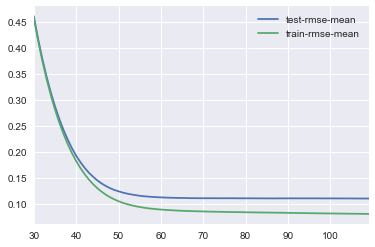

In [391]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [392]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [393]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_stacked_lasso.predict(X_test))

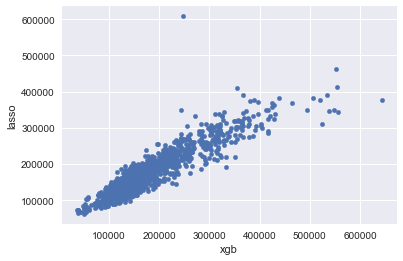

In [394]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [395]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [396]:
solutionXgb = pd.DataFrame({"id":test.Id, "SalePrice":preds},columns = ("id","SalePrice"))
solutionXgb.to_csv("outputs/xgb_sol.csv", index = False)

This solution scored 0.15933

### 6. Improving the score

#### Using elastic net on stacked features

In [397]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [398]:
model_elastic = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1],alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(model_elastic).mean()

0.1069866322501479

In [399]:
elastic_preds = np.expm1(model_elastic.predict(X_test))
solutionElastic = pd.DataFrame({"id":test.Id, "SalePrice":elastic_preds},columns = ("id","SalePrice"))
solutionElastic.to_csv("outputs/elastic_sol.csv", index = False)

This solution gives us a score of 0.12050

#### Using xgb with lasso on stacked features

In [400]:
elastic_results = model_elastic.predict(all_data)
all_data['Elastic'] = elastic_results

In [401]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]

In [402]:
model_stacked_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
rmse_cv(model_stacked_lasso).mean()

0.1068191316288053

In [403]:
lasso_preds_stacked2 = np.expm1(model_stacked_lasso.predict(X_test))
solutionLasso2 = pd.DataFrame({"id":test.Id, "SalePrice":lasso_preds_stacked2},columns = ("id","SalePrice"))
solutionLasso2.to_csv("outputs/stacked_lasso_sol.csv", index = False)

In [404]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [405]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_stacked_lasso.predict(X_test))

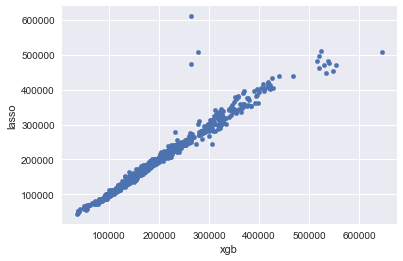

In [406]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [407]:
preds = 0.7*lasso_preds + 0.3*xgb_preds

In [408]:
solutionXgb = pd.DataFrame({"id":test.Id, "SalePrice":preds},columns = ("id","SalePrice"))
solutionXgb.to_csv("outputs/xgb_sol2.csv", index = False)

Using this solution also gives a score of 0.12050

### 7-9. Findings

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/32381

We found this discussion post where the poster mentioned that instead of improving models that already work well, you can combine multiple models that work well and they may do even better. We tried this with ElasticNet, stacking features, and using xgboost. While not all these attempts worked, it improved our previous best score of 0.12093 to 0.12050.